# 순환 신경망(Recurrent Neural Network, RNN)

* RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로 보내면서, <br>
다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고 있다.

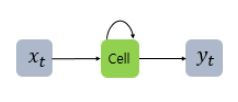

<br>

* RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(Cell)이라고 한다. <br>
이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 <b>메모리 셀</b> 또는 <b>RNN</b> 셀 이라고 표현한다.

* 메모리 셀이 출력층 방향으로 도는 다음 시점 t+1의 자신에게 보내는 값을 <b>은닉 상태(hidden state)</b>라고 한다. <br>
다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용한다.

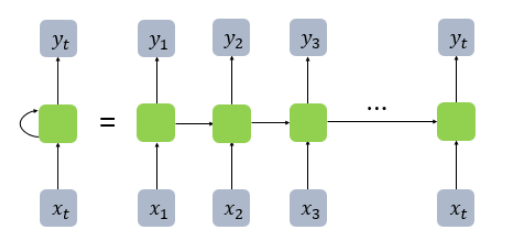

<br>

* RNN은 입력과 출력의 길이를 다르게 설계할 수 있으므로 다양한 용도로 사용할 수 있다. <br>
아래 그림은 입력과 출력의 길이에 따라서 달라지는 RNN의 다양한 형태를 보여준다. <br>
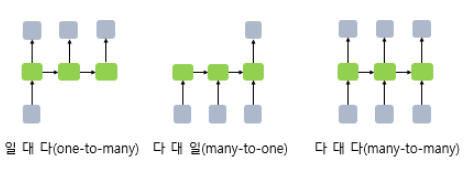

<br>

* RNN 셀의 각 시점 별 입,출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'이다.

<br>

* 배치 크기가 1이고, d(단어 벡터의 차원)와 D_h(은닉 상태의 크기) 두 값 모두를 4로 가정하였을 때, RNN의 은닉층 연산을 그림으로 표현하면 아래와 같다.
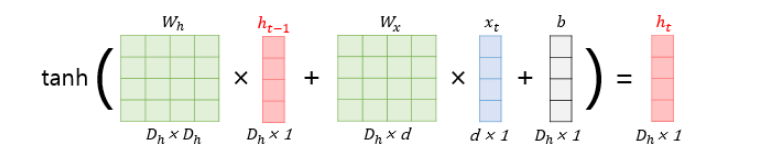

## Keras로 구현

In [1]:
import tensorflow as tf

2021-08-11 11:08:10.505152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-11 11:08:10.505181: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# RNN 층을 추가하는 코드
hidden_size = 3

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.SimpleRNN(hidden_size))

In [8]:
# 추가 인자를 사용할 때
timesteps = 3
input_dim = 3
tf.model.add(tf.keras.layers.SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))

# 다른 표기
M = timesteps
N = input_dim
tf.model.add(tf.keras.layers.SimpleRNN(hidden_size, input_length=M, input_dim=N))

* hidden_size = 은닉 상태의 크기를 정의 <br>
메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일 <br>
RNN의 용량(capacity)을 늘린다고 보면된다.<br>(중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다
* timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함, 시점의 수
* input_dim = 입력의 크기

<br>
RNN층은 <b>(batch_size, timesteps, input_dim)</b> 크기의 3D 텐서를 입력으로 받는다.<br>

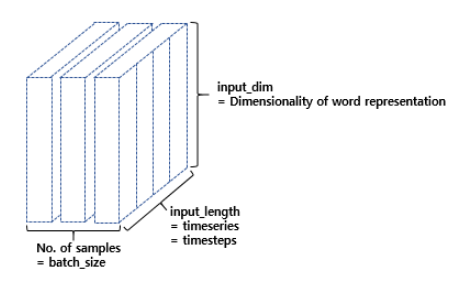

RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 반환한다.
* 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 <br>
<b>(batch_size, output_dim)</b> 크기의 2D 텐서를 리턴한다.
* 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 <br>
<b>(batch_size, timesteps, output_dim)</b> 크기의 3D 텐서를 리턴한다.
* RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능하다.(default = False) <br>
 True를 설정하면 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력한다.
 False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력한다. <br>
 이 하나의 값은 마지막 시점(time step)의 메모리 셀의 은닉 상태값이다.

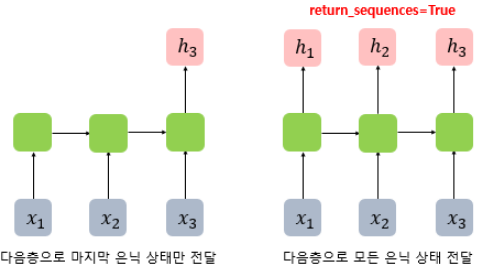

<h3>출력값이 (batch_size, output_dim)의 2D 텐서일 때</h3>

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [10]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


<h3>batch_size가 있는 2D 텐서</h3>

In [12]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


<h3>출력값이 (batch_size, timesteps, output_dim)의 3D 텐서일 때</h3>

* return_sequences=True 설정됨

In [11]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


## 깊은 순환 신경망(Deep RNN)

* 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여준다.

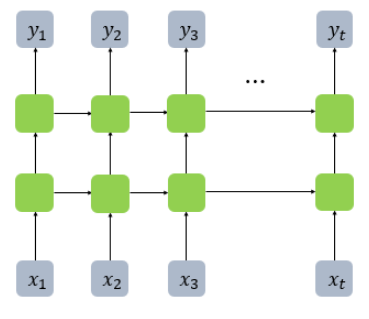

* 은닉층을 2개 추가하는 경우 코드는 아래와 같다

In [15]:
hidden_size = 3

model = Sequential()

# 첫 번째 은닉층은 다음 은닉층이 존재하므로 return_sequences=True로 설정
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))

## 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

* 양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 <br>
이전 시점의 데이터뿐만 아니라 이후 데이터로도 예측할 수 있다는 아이디어에 기반

* RNN이 과거 시저(time step)의 데이터들을 참고해서 <br>
찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 <br>
향후 시점의 데이터에도 힌트가 있는 경우를 고안해 만들어진 것이 <b>양방향 RNN</b>이다.

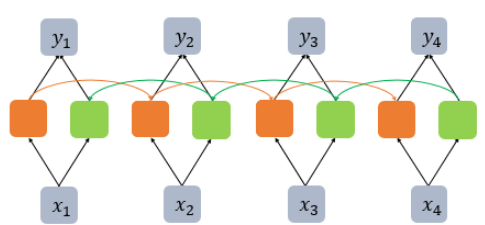

* 양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 2개의 메모리 셀을 이용한다.
    - 첫 번째 메모리 셀은 이전과 같이 앞 시점의 은닉 상태(Forward States)를 전달받아 현재 은닉 상태를 계산한다. (위 그림에서 주황색 메모리 셀)
    - 두 번째 메모리 셀은 앞 시점의 은닉 상태가 아닌 <b>뒤 시점의 은닉상태(Backward States)</b>를 전달 받아 현재의 은닉 상태를 계산한다. (위 그림에서 초록색 메모리 셀)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional

hidden_size = 4
timesteps = 4
input_dims = 10

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True), 
                        input_shape=(timesteps, input_dims)))

* 양방향 RNN도 다수의 은닉층을 가질 수 있다.

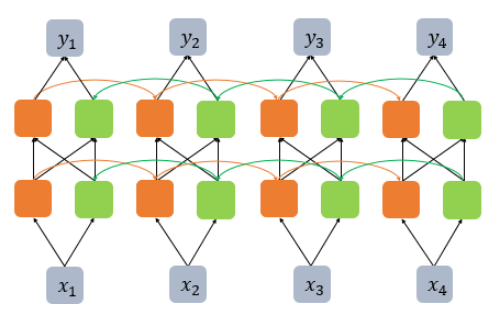

* 하지만 다른 인공 신경망 모델들과 마찬가지로 은닉층을 무조건 많이 추가한다고 해서 모델의 성능이 좋아지는 것은 아니다.
* 은닉층을 추가하면 학습할 수 있는 양이 많아지지만 <br>
반대로 훈련 데이터 또한 그만큼 많이 필요하다.
* 아래 코드는 은닉층이 4개인 경우를 보여준다.

In [18]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), 
                        input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))

## Quiz

RNN을 제대로 이해했는지 퀴즈를 통해서 확인해보세요! <br>
모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요. <br><br>

Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다. <br>
은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다. <br>
훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다. <br>
이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다. <br>
은닉층은 1개입니다.

In [44]:
from tensorflow.keras.layers import Dense, Embedding

hidden_state_size = 128
vocab_size = 5000
embedding_size = 100
sample_len = 30


model = Sequential()
model.add(Embedding(vocab_size, embedding_size))
model.add(SimpleRNN(hidden_state_size))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
simple_rnn_32 (SimpleRNN)    (None, 128)               29312     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________


* 풀이
    - Embedding = 5,000(input) * 100(embedding) = 500,000
    - Wh = 128 * 128 = 16,384
    - Wx = 128 * 100 = 12,800
    - b = 128 * 1 = 128
    - h_(t-1) = 128 * 1 = 128
    - x_t = 100 * 1 = 100
    - output = 1
    - 500000+12800+16384+128+128+1 = 529,441